In [119]:
# mengimport library untuk memperoses image .
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os

In [120]:
# fungsi untuk membaca file dari directori
def insertGambar(folder): # deklarasi nama fungsi dan parameter input yang dibutuhkan untuk menjalankan fungsi
    filenames = [] # deklarasi variabel(list) untuk menyimpan nama dari setiap file
    datalabel = [] # deklarasi variabel(list) untuk menyimpan nama folder
    for label in os.listdir(folder):
        datalabel.append(label)
        file = []
        for filename in os.listdir("Batik/"+label):
            file.append(filename)
        filenames.append(file)
    return filenames, datalabel # mengembalikan nilai sebagai output dari function

In [121]:
# memanggil function untuk membaca file dan menyimpannya dalam variabel filenames dan label
filenames, label = insertGambar("Batik")

In [122]:
#fungction untuk menampilkan file sekaligus memilih 20 file dari setiap folder
def Image_Show(filenames,label):
    plt.figure(figsize=(20,100))
    k=0
    image=[]
    filename1=[]
    for i in range (len(label)):
        for j in range (20): # perulangan untuk mengambil 20 file dari setiap folder
            img=plt.imread("Batik/"+label[i]+"/"+filenames[i][j])
            img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            image.append(img)
            filename1.append(filenames[i][j])
            k+=1
            plt.subplot(20,5,k)
            plt.title(label[i]+"  -  "+filenames[i][j])
            plt.imshow(img,"gray")
    return image, filename1 # mengembalikan nilai image dan filename1 sebagai output dari function Image_show

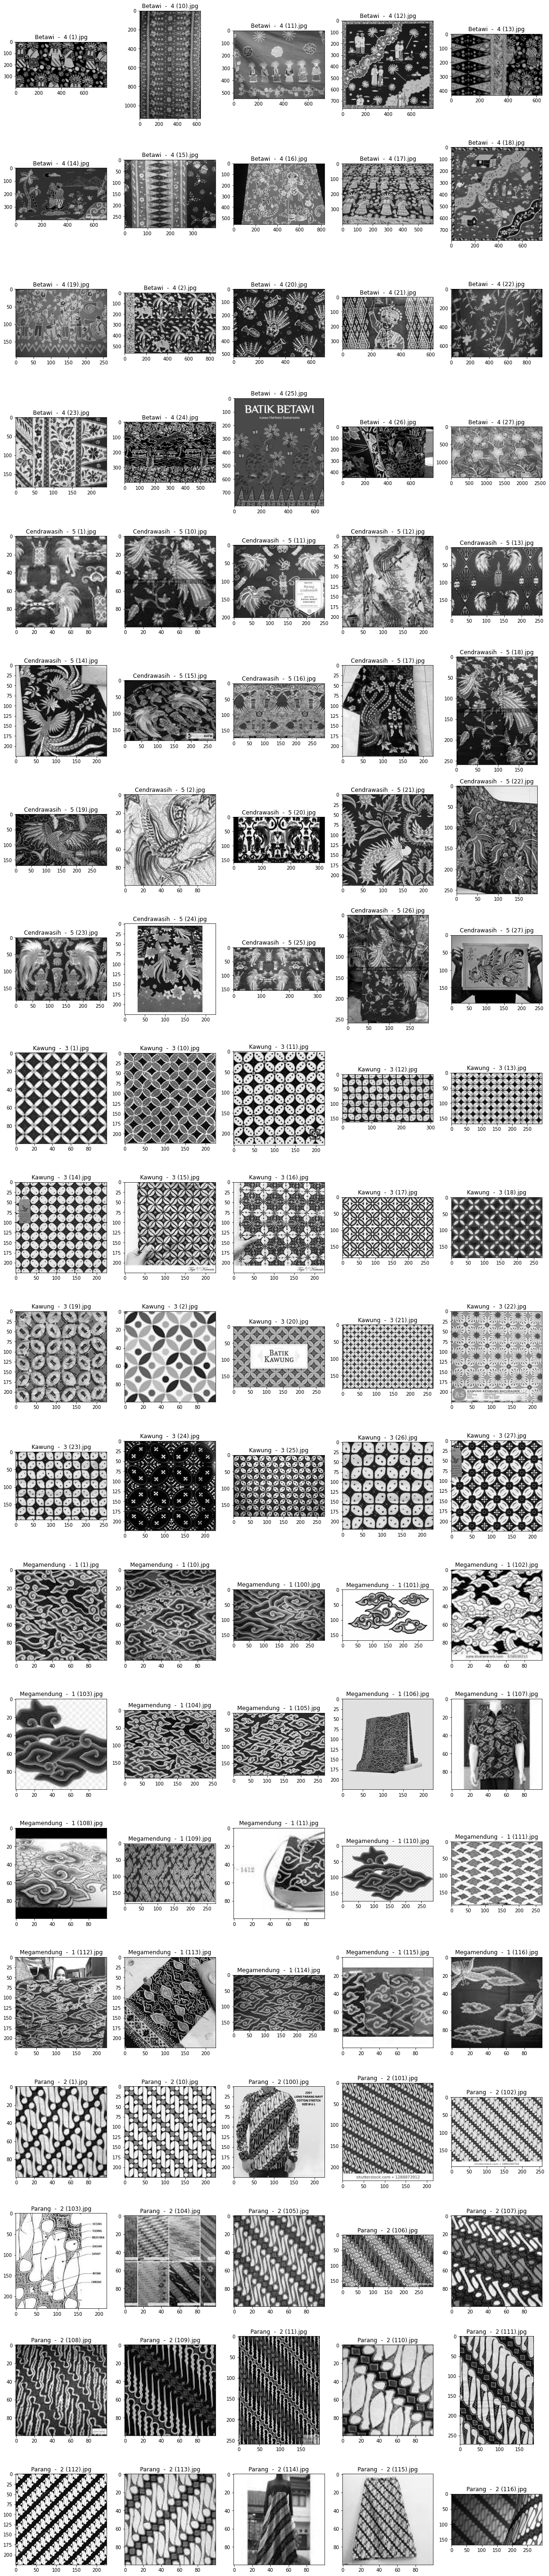

In [123]:
images,filename1=Image_Show(filenames,label)

In [129]:
#kode di bawah digunakan untuk mencari matriks coocurence derajat 0 dari masing2 datset yang telah di masukan
def coocurence_0 (img): # deklarasi nama function dan parameter input yang dibutuhkan
    max= np.max(img) # mengambil dan menyimpa nilai maksimal dari image
    imgTmp=np.zeros([int(max)+1,int(max)+1]) # membuat array dua dimensi untuk menyimpan matrik coocurence
    for i in range (len(img)):  # perulangan sebanyak image yang akan dicari matrik coocurence nya
        for j in range (len(img[i])-1): # perulangan untuk mengakses setiap piksel
            imgTmp[int(img[i,j]),int(img[i,j+1])]+=1 # perulangan untuk mengakses setiap piksel
    
    transpos =np.transpose(imgTmp) # transpose matrik coocurence dan menyimpannya dalam variabel
    data=imgTmp+transpos # menjumlahkan matrik coocurence dan hasil transpose nya
    
    tmp=0
    # menghitung total elemen dalam matriks
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # melakukan normalitas pada matriks
    for i in range (len(data)):
        for j in range (len(data)):
            data[i,j]/=tmp
    return data
#kode di atas digunakan untuk mencari derajat 0 dari masing2 datset yang telah di masukan

In [130]:
#kode di bawah digunakan untuk mencari matriks coocurence derajat 45 dari masing2 datset yang telah di masukan
def coocurence_45 (img): # deklarasi nama function dan parameter input yang dibutuhkan
    max= np.max(img) # mengambil dan menyimpa nilai maksimal dari image
    imgTmp=np.zeros([int(max)+1,int(max)+1]) # membuat array dua dimensi untuk menyimpan matrik coocurence
    for i in range (len(img)-1): # perulangan sebanyak image yang akan dicari matrik coocurence nya
        for j in range (len(img[i])-1): # perulangan untuk mengakses setiap piksel
            imgTmp[int(img[i+1,j]),int(img[i,j+1])]+=1 # perulangan untuk mengakses setiap piksel
    
    transpos =np.transpose(imgTmp) # transpose matrik coocurence dan menyimpannya dalam variabel
    data=imgTmp+transpos # menjumlahkan matrik coocurence dan hasil transpose nya
    
    tmp=0
    # menghitung total elemen dalam matriks
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # melakukan normalitas pada matriks
    for i in range (len(data)):
        for j in range (len(data)):
            data[i,j]/=tmp
    return data # mengembalikan nilai

In [131]:
#kode di bawah digunakan untuk mencari matriks coocurence derajat 90 dari masing2 datset yang telah di masukan
def coocurence_90 (img):  # deklarasi nama function dan parameter input yang dibutuhkan
    max= np.max(img) # mengambil dan menyimpa nilai maksimal dari image
    imgTmp=np.zeros([int(max)+1,int(max)+1]) # membuat array dua dimensi untuk menyimpan matrik coocurence
    for i in range (len(img)-1): # perulangan sebanyak image yang akan dicari matrik coocurence nya
        for j in range (len(img[i])): # perulangan untuk mengakses setiap piksel
            imgTmp[int(img[i+1,j]),int(img[i,j])]+=1 # menghitung nilai untuk matrik coocurance
    
    transpos =np.transpose(imgTmp) # transpose matrik coocurence dan menyimpannya dalam variabel
    data=imgTmp+transpos # menjumlahkan matrik coocurence dan hasil transpose nya
    
    tmp=0
    # menghitung total elemen dalam matriks
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # melakukan normalitas pada matriks
    for i in range (len(data)):
        for j in range (len(data)):
            data[i,j]/=tmp
    return data

In [132]:
#kode di bawah digunakan untuk mencari matriks coocurence derajat 135 dari masing2 datset yang telah di masukan
def coocurence_135 (img):
    max= np.max(img)
    imgTmp=np.zeros([int(max)+1,int(max)+1])
    for i in range (len(img)-1):
        for j in range (len(img[i])-1):
            imgTmp[int(img[i+1,j+1]),int(img[i,j])]+=1
    
    transpos =np.transpose(imgTmp)
    data=imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    
    for i in range (len(data)):
        for j in range (len(data)):
            data[i,j]/=tmp
    return data

In [133]:
# code berfungsi untuk menghitung matriks coocurence dari setiap image dengan function yang telah di deklarasikan
# dan menyimpannya dalam array
hasil=[]
for i in range(len(images)):
    data=[]
    data.append(coocurence_0 (images[i]))
    data.append(coocurence_45 (images[i]))
    data.append(coocurence_90 (images[i]))
    data.append(coocurence_135 (images[i]))
    hasil.append(data)

In [134]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai kontras dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def contras (data):
    contras=0
    for i in range (len(data)):
        for j in range (len(data)):
            contras+=data[i,j]*pow(i-j,2)
    return contras 

In [135]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai entropy dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def entropy (data):
    entro=0
    for i in range (len(data)):
        for j in range (len(data)):
            if data[i,j] > 0.0:
                entro += -(data[i,j]* math.log(data[i,j]))
    return entro

In [136]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai homogenitas dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def homogenitas (data):
    homogen=0
    for i in range (len(data)):
        for j in range (len(data)):
                homogen+=data[i,j]*(1+(pow(i-j,2)))
    return homogen

In [137]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai energy dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def energi (data):
    energi=0
    for i in range (len(data)):
        for j in range (len(data)):
            energi+=data[i,j]**2
    return energi

In [138]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai ASM dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def Asm (data):
    asm=0
    for i in range (len(data)):
        for j in range (len(data)):
                asm += pow(data[i,j],2)
    return asm

In [139]:
#code di bawah merupakan rumus yang berfungsi untuk mencari nilai dissimilarty dari dataset yang telah di dilakukan berdasarkan matrik coocurence
def dissimilarty(data):
    diss=0
    for i in range (len(data)):
        for j in range (len(data)):
            diss+= data[i,j]+abs(i-j)
    return diss

In [140]:
#code bawah digunakan untuk menghitung hasil dari proses ektraksi glcm energi, homogenitas, entropy, Asm dan dissimilarty yang telah di lakukan dengan masing2 derajat
data0energi=[]
data0=[]
x=['0','45','90','135']
data45=[]
data90=[]
data135=[]
hasilnya=[]

for j in range(len(hasil)):
    da=[]
    da.append(filename1[j])
    for i in hasil[j]:
        dx=energi(i)
        da.append(dx)
            
        dh=homogenitas (i)
        da.append(dh)
            
        den=entropy(i)
        da.append(den)
            
        dco=contras (i)
        da.append(dco)
        
        dca=Asm (i)
        da.append(dca)
        
        dcc=dissimilarty (i)
        da.append(dcc)
        
    hasilnya.append(da)

In [141]:
namatabel =['namafile','energy_0','homogenity_0','entrophy_0','contrast_0','Asm_0','dissimilarty_0',
           'energy_45','homogenity_45','entrophy_45','contrast_45','Asm_45','dissimilarty_45', 
           'energy_90','homogenity_90','entrophy_90','contrast_90','Asm_90','dissimilarty_90',
           'energy_135','homogenity_135','entrophy_135','contrast_135','Asm_135','dissimilarty_135']
tabel =pd.DataFrame(hasilnya,columns=namatabel)

In [142]:
tabel.head()
tabel

namafile  energy_0  homogenity_0  entrophy_0   contrast_0     Asm_0  \
0     4 (1).jpg  0.004609   1231.042944    8.536610  1230.042944  0.004609   
1    4 (10).jpg  0.000365    912.533474    9.102755   911.533474  0.000365   
2    4 (11).jpg  0.001119    523.495598    8.120292   522.495598  0.001119   
3    4 (12).jpg  0.003898    671.953192    7.910742   670.953192  0.003898   
4    4 (13).jpg  0.005216   1330.021058    8.882931  1329.021058  0.005216   
..          ...       ...           ...         ...          ...       ...   
95  2 (112).jpg  0.000672   4449.907024    8.633683  4448.907024  0.000672   
96  2 (113).jpg  0.000157   3237.805758    9.168599  3236.805758  0.000157   
97  2 (114).jpg  0.031045    968.274949    7.405872   967.274949  0.031045   
98  2 (115).jpg  0.003150   2704.153535    8.096462  2703.153535  0.003150   
99  2 (116).jpg  0.000381    310.044323    8.658352   309.044323  0.000381   

    dissimilarty_0  energy_45  homogenity_45  entrophy_45  ...  entrophy_90  \
0     5.271001e+06   0.003712    2201.243754     8.738778  ...     8.509467   
1     5.592321e+06   0.000298    1592.241497     9.297627  ...     9.079293   
2     5.592321e+06   0.000644     815.995538     8.531540  ...     8.325558   
3     4.901961e+06   0.003026    1072.027312     8.101098  ...     7.921828   
4     5.146001e+06   0.003860    2260.336216     9.091148  ...     8.908468   
..             ...        ...            ...          ...  ...          ...   
95    5.592321e+06   0.000808    5195.169165     8.677444  ...     8.459081   
96    5.592321e+06   0.000148    4316.154168     9.205942  ...     8.946674   
97    5.592321e+06   0.029895    1007.443118     7.466650  ...     7.176803   
98    5.592321e+06   0.002279    3637.637792     8.221730  ...     8.014870   
99    4.055591e+06   0.000301     252.487260     8.769824  ...     8.291935   

    contrast_90    Asm_90  dissimilarty_90  energy_135  homogenity_135  \
0   1149.664677  0.004617     5.271001e+06    0.003742     1936.832896   
1    971.350761  0.000389     5.592321e+06    0.000298     1520.415203   
2    501.049970  0.000791     5.592321e+06    0.000751      822.179135   
3    686.248567  0.003761     4.901961e+06    0.003007     1169.087548   
4   1418.900943  0.004990     5.146001e+06    0.003853     2318.762938   
..          ...       ...              ...         ...             ...   
95  2657.179960  0.001112     5.592321e+06    0.000622     6276.652742   
96  1321.496061  0.000223     5.592321e+06    0.000149     3715.883787   
97   461.119091  0.041307     5.592321e+06    0.029623     1415.461688   
98  1877.875152  0.003094     5.592321e+06    0.002638     2385.380982   
99   106.375323  0.000557     4.055591e+06    0.000298      489.112085   

    entrophy_135  contrast_135   Asm_135  dissimilarty_135  
0       8.702617   1935.832896  0.003742      5.271001e+06  
1       9.288251   1519.415203  0.000298      5.592321e+06  
2       8.421293    821.179135  0.000751      5.592321e+06  
3       8.123839   1168.087548  0.003007      4.901961e+06  
4       9.097624   2317.762938  0.003853      5.146001e+06  
..           ...           ...       ...               ...  
95      8.752839   6275.652742  0.000622      5.592321e+06  
96      9.195421   3714.883787  0.000149      5.592321e+06  
97      7.508474   1414.461688  0.029623      5.592321e+06  
98      8.173384   2384.380982  0.002638      5.592321e+06  
99      8.859285    488.112085  0.000298      4.055591e+06  

[100 rows x 25 columns]